# Import Libraries

In [102]:
import os
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
# modelFile = "models/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb/frozen_inference_graph.pb"
# configFile = "models/ssd_mobilenet_v2_coco_2018_03_29.pbtxt"
classFile = "coco_class_labels.txt"

# Check Class Labels

In [104]:
with open(classFile) as fp:
    labels = fp.read().split("\n")
print(labels)

['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush', '']


# Read Tensorflow Model

In [105]:
modelFile  = os.path.join("models", "ssd_mobilenet_v2_coco_2018_03_29", "frozen_inference_graph.pb")
configFile = os.path.join("models", "ssd_mobilenet_v2_coco_2018_03_29.pbtxt")

In [106]:
# Read the Tensorflow network
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

# Detect Objects

In [107]:
# For each file in the directory
def detect_objects(net, img):
    dim = 300
    
    blob = cv2.dnn.blobFromImage(img, 1.0, size=(dim, dim), mean=(0, 0, 0), swapRB=True, crop=False)
    net.setInput(blob)
    
    # Perform prediction
    objects = net.forward()
    return objects

In [108]:
def display_text(img, text, x, y):
    textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]
    
    # Create a white rectangle using text size
    cv2.rectangle(img, (x, y-dim[1] - baseline), (x+dim[0], y + baseline), (0, 0, 0), cv2.FILLED)
    # Display text inside the rectangle
    cv2.putText(img, text, (x, y-5), FONTFACE, FONT_SCALE, (0, 0, 255), THICKNESS, cv2.LINE_AA)

# Display Objects

In [109]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.7
THICKNESS = 1

def display_objects(img, objects, threshold = 0.25):
    rows, cols = img.shape[:2]
    
    # Detect every object
    for i in range(objects.shape[2]):
        # Find the class and confidence score
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])
        
        x = int(objects[0, 0, i, 3] * cols)
        y = int(objects[0, 0, i, 4] * rows)
        w = int(objects[0, 0, i, 5] * cols - x)
        h = int(objects[0, 0, i, 6] * rows - y)
        
        # Check if the detection is of good quality
        if score > threshold:
            display_text(img, "{}".format(labels[classId]), x, y)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    mp_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(30,10)); plt.imshow(mp_img); plt.axis("off"); plt.show();

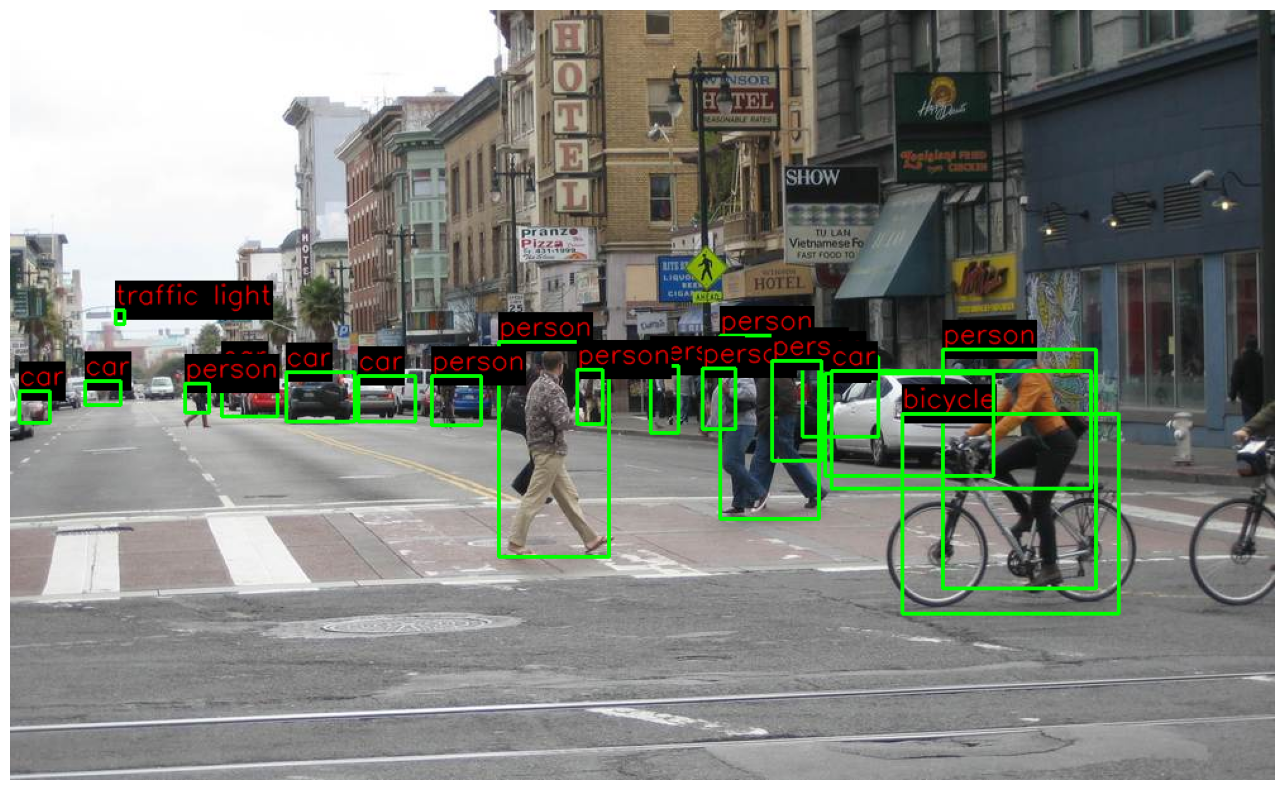

In [110]:
img = cv2.imread("images/street.jpg")
objects = detect_objects(net, img)
display_objects(img, objects)

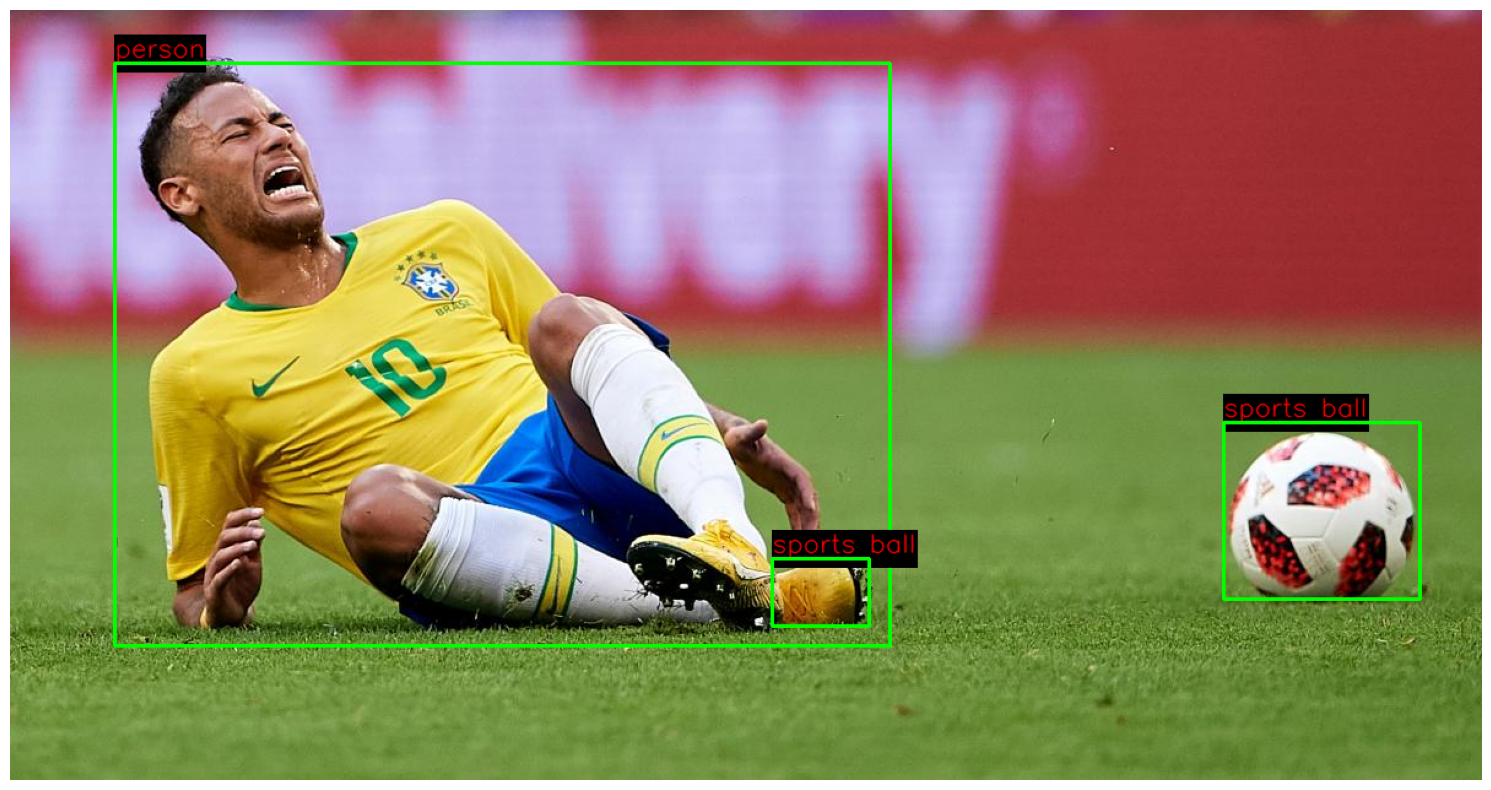

In [112]:
img = cv2.imread("images/soccer.jpg")
objects = detect_objects(net, img)
display_objects(img, objects)

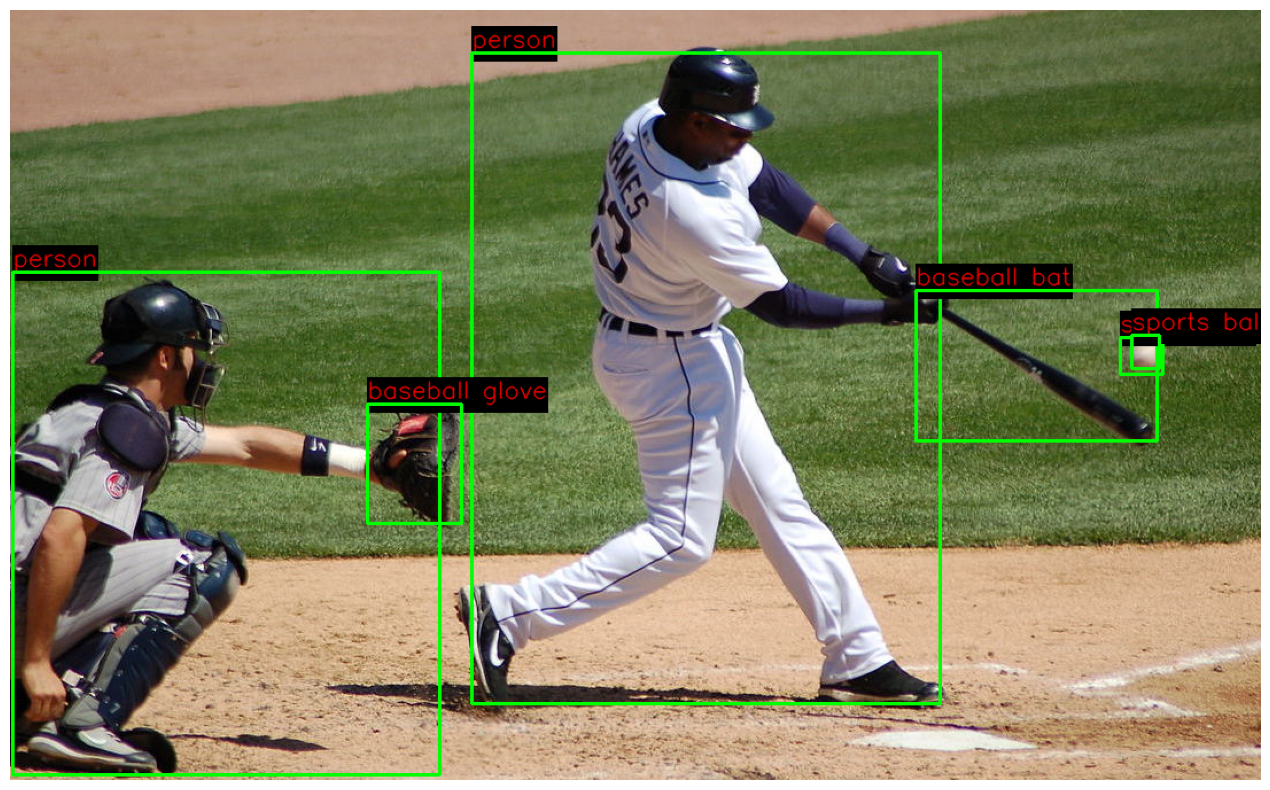

In [114]:
img = cv2.imread("images/baseball.jpg")
objects = detect_objects(net, img)
display_objects(img, objects)